[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/prestrepoh/NLP-techniques-for-topic-extraction/blob/main/complete-thesis.ipynb)

# Multilabel Topic Classification for Software Product Reviews
Pablo Restrepo,  
*Department of Informatics, Technical University of Munich (TUM), Boltzmannstr. 3, 85748 Garching, Germany*  
pablo.restrepo@tum.de

## Introduction



Topic extraction is a technique from natural language processing (NLP) that identifies the different topics present in a text. This technique can be divided in two different categories: unsupervised topic extraction (topic modeling), which clusters unlabeled data by topic similarity (Alghamdi & Alfalqi, 2015), and supervised topic extraction (topic classification), which is used to identify the topics or theme of a text from a list of predefined labels (Minaee et al., 2020).

In the last years, the growth of the web and social media platforms has allowed us to gather enormous quantities of textual data (Mei et al., 2008). In particular, the review systems offered by software stores like Google play Store and Apple App store has allowed us to have access to millions of reviews of software products, which can be used for many different NLP applications in a variety of areas. In addition to this, NLP has emerged in the last decade as a useful tool assist in the software development process, and has been used for many tasks including automated risk identification (Vijayakumar & Arun, 2017), Requirement Engineering (Nazir et al., 2017) and Automatic test cases generation (Allala et al., 2019).

When developing software products, it is important to be able to identify early when there are bugs or problems present, to correct them as soon as possible. Also, it is necessary to be able to understand which features are liked or disliked by the users to improve the applications being developed. For this purpose, topic extraction techniques can be used to identify the topics of the comments given by the users of a particular applications in a software store, which can be useful to help find bugs and understand what the users like or dislike from the software product.

In this paper, we will investigate different topic classification techniques applied to reviews of software products written by users in the Google Play store. For this, we will compare the results obtained after applying 4 classical methods for text classification techniques: Naïve Bayes, Support Vector Classifier, Logistic Regression and K-Nearest Neighbors, and three transformer-based methods based on BERT, RoBERTa and XLNet to a dataset consisting of 1048575 reviews from the Google Play Store, labeled with 33 different topics.

## Related Work


Many different techniques have been used for text classification in the past, including Naïve Bayes (Qu et al., 2012; Wang & Manning, 2012), Support Vector Machines (Quercia et al., 2012; Wang & Manning, 2012), Logistic Regression (Iman et al., 2017), graph-based methods (Cordobés et al., 2014; Varga et al., 2014) and deep learning methods (Bengio et al., 2003).

The first methods based on deep learning underperformed classical methods, and for this reason were not widely used. Despite this, a paradigm change was produced when larger embedding models started being trained in much larger data. After this happened, multiple methods based on deep learning started being widely used including CNN-Based Models, RNN-Based Models, Siamese Neural Networks, Graph Neural Networks and LSTMs (Minaee et al., 2020). In 2017, Google introduced the transformer model, which is based exclusively in attention mechanisms and was more parallelizable than previous deep learning architectures (Vaswani et al., 2017). Following this, multiple transformer-based models were developed including GPT (Radford, 2018), GPT-2 (Radford et al., 2019) and BERT (Devlin et al., 2019). According to the quantitative results obtained by Minaee et al. (2020) after evaluating multiple methods in the DBpedia dataset, XLNet  is the state of the art model for the task of topic classification, closely followed by BERT.

Despite the success of deep learning-based methods in the NLP area, classical methods like Naïve Bayes are still widely used in practice (Webb, 2016), this is in part, because deep learning methods require enormous amount of data in order to obtain good results, and in occasions underperform classical methods when there is few training data available (Anding et al., 2019).

This paper explores the task of multi-label topic classification in the context of software products reviews by evaluating different text classification techniques in a dataset that contains reviews from the Google Play store, labeled with 33 different topics. The main contribution of this paper is to evaluate and compare the performance of different classical and deep-learning topic classification techniques in the particular domain of software product reviews, which can be useful to develop tools that assist in the process of developing and maintaining software products.

## Fundamentals



### Natural Language Processing
According to Chowdhary (2020, p. 603), “Natural Language Processing (NLP) is an area of research and application that explores how computers can be used to understand and manipulate natural language text or speech to do useful things”. This area includes the study of text classification and topic classification.


### Text classification
Ikonomakis et al. (2005, p. 1) Defines text classification as “the task of classifying a document under a predefined category. More formally, if di is a document of the entire set of documents D and (c1,c2,…cn) is the set  of  all  the  categories,  then  text  classification  assigns one category cj to a document di”. In our particular study case, the set of documents D consists of a the dataset with reviews from the Google Play Store, and our set of categories is the 33 topics present in the dataset.


### Topic Classification
Topic classification is a subtask of text classification, that according to the definition of  (Minaee et al., 2020, p. 3), “aims to identify the theme or topics of a text (e.g., whether a product review is about “customer support” or “ease of use”)”.


### Binary Relevance
Binary relevance is a strategy used hen dealing with multilable classification problems, on which each sample can have more than one label at the same time. This strategy consists in dividing the problem in multiple binary classification tasks. To do this, a classifier is trained for each label present in the dataset.

### Naïve Bayes
The Naïve Bayes algorithm is defined by Webb (2016, p. 1) as “a simple learning algorithm that utilizes Bayes’ rule together with a strong assumption that the attributes are conditionally independent given the class”. He also says that “While this independence assumption is often violated in practice, Naïve Bayes nonetheless often delivers competitive classification accuracy.  Coupled with its computational efficiency and many other desirable features, this leads to naïve Bayes being widely applied in practice”. In the NLP area, when using the Naïve Bayes, the count of words is usually used as features to the classifier.


### Support Vector Classifier (SVC)
A SVC, is a classifier based on Support Vector Machines (SVM). According to Srivastava and Bhambhu (2010, p. 2), “SVM map input vector to a higher dimensional space where a maximal separating hyperplane is constructed. Two parallel hyperplanes are constructed on each side of the hyperplane that separate the data. The separating hyperplane is the hyperplane that maximize the distance between the two parallel hyperplanes.” As in the Naïve Bayes classifier, in NLP, usually the words contained in the sentence are used as features of the classifier.


###Logistic Regression
Logistic regression is a mathematical model based on the logistic function, that can be used to describe the relationship of multiple variables. According to Richardson (2011, pp. 5-7), “The fact that the logistic function f(z) ranges between 0 and 1 is the primary reason the logistic model is so popular. The model is designed to describe a probability, which is always some number between 0 and 1.” This model can help classify text in NLP by using the words present in the text as features.


###K-nearest neighbor
KNN is a classification algorithm that according to Yong et al. (2009, p. 232), “predicts the test sample’s category according to the K training samples which are the nearest neighbors to the test sample and judge it to that category which has the largest category probability.”. In our particular study, we will be using the approach described by Spyromitros-Xioufis et al. (2008) for doing multilabel classification using the KNN algorithm.


###Transformer
Vaswani et al. (2017, p. 2) describes the Transformer as a “model architecture eschewing recurrence and instead relying entirely on an attention mechanism to draw global dependencies between input and output. The Transformer allows for significantly more parallelization and can reach a new state of the art in translation quality”.
In this architecture, and encoder and a decoder are used as shown in the following Figure:

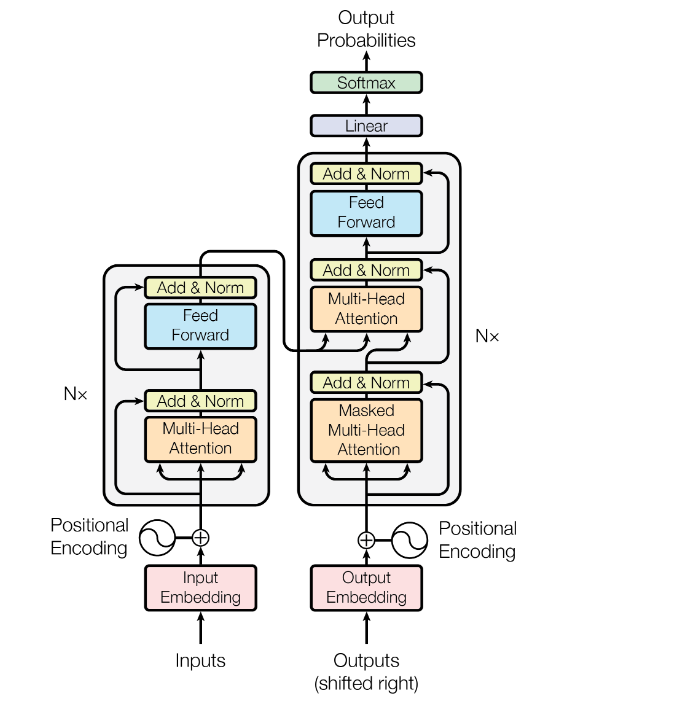

*Note: from Vaswani, Ashish, et al. “Attention Is All You Need.” ArXiv:1706.03762 [Cs], Dec. 2017. arXiv.org, http://arxiv.org/abs/1706.03762.*

This model uses Scaled Dot-Product Attention and Multi-Head Attention.


#### Scaled Dot-Product Attention
In the paper by Vaswani et al. (2017, p. 4), Scaled Dot-Product Attention is defined as and attention mechanism on which “the input consists of queries and keys of dimension $d_k$, and values of dimension $d_v$. We compute the dot products of the query with all keys, divide each by $\sqrt{d_k}$, and apply a softmax function to obtain the weights on the values. In practice, we compute the attention function on a set of queries simultaneously, packed together into a matrix $Q$. The keys and values are also packed together into matrices $K$ and $V$.”
The scaled dot-product attention is calculated using the equation:

$$ {Attention}(Q, K, V) = {softmax}(\frac{QK^{T}}{\sqrt{d_k}})V $$

#### Multi-Head Attention
Vaswani et al. (2017, p. 4) says: “Instead of performing a single attention function with $d_{model}$-dimensional keys, values and queries, we found it beneficial to linearly project the queries, keys and values $h$ times with different, learned linear projections to $d_k$,$d_k$ and $d_v$ dimensions, respectively. On each of these projected versions of queries, keys and values we then perform the attention function in parallel, yielding $d_v$-dimensional output values.  These are concatenated and once again projected, resulting in the final values”.  
This is depicted in the equation:
$$ \text{MultiHead}\left(\textbf{Q}, \textbf{K}, \textbf{V}\right) = \left[\text{head}_{1},\dots,\text{head}_{h}\right]\textbf{W}_{0}$$  
$$\text{where} \text{ head}_{i} = \text{Attention} \left(\textbf{Q}\textbf{W}_{i}^{Q}, \textbf{K}\textbf{W}_{i}^{K}, \textbf{V}\textbf{W}_{i}^{V} \right) $$  

Scaled Dot-Product Attention and Multi-Head Attention are depicted in the following figure:

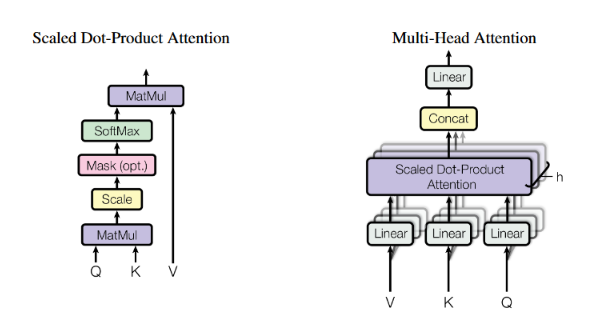

*Note: from Vaswani, Ashish, et al. “Attention Is All You Need.” ArXiv:1706.03762 [Cs], Dec. 2017. arXiv.org, http://arxiv.org/abs/1706.03762.*

### BERT
BERT stands for Bidirectional Encoder Representations from Transformers. Devlin et al. (2019, p. 1), says that “Unlike recent language representation models, BERT is designed to pre-train deep bidirectional representations from unlabeled text by jointly conditioning on both left and right context in all layers.  As a result, the pre-trained BERT model can be fine-tuned with just one additional output layer to create state-of-the-art models for a wide range of tasks, such as question answering and language inference, without substantial task-specific architecture modifications.”. BERT is the current state of the art embedding model (Minaee et al., 2020).


### RoBERTa
RoBERTa is an improved recipe for training BERT models. (Liu et al., 2019). In this model, a few changes were introduced to the original BERT model. According to Liu et al. (2019, p. 1), these modification s include: “(1) training the model longer, with bigger batches, over more data; (2) removing the next sentence prediction objective; (3) training on longer sequences; and (4) dynamically changing the masking pattern applied to the training data”.


### XLNet
XLNet is the current state of the art in the task of topic classification (Minaee et al., 2020). Yang et al. (2020, p. 1), defines XLNet as a “generalized autoregressive pretraining method that enables learning bidirectional contexts by maximizing the expected likelihood over all permutations of the factorization order and overcomes the limitations of BERT thanks to its autoregressive formulation.  Furthermore, XLNet integrates ideas from Transformer-XL, the state-of-the-art autoregressive model, into pretraining.”

## Solution Approach



**Describe our method (we use different classifiers, train them in our data and evaluate them in terms of accuracy and F1 score)**
**Mention that we used binary relevance for our classical methods**
**Mention what we did for the dl methods**
**Describe the classifiers we used**
**Describe the metrics used**


In this section, we will show the exploratory data analysis that we did for our dataset, how we preprocessed it, and the classical and deep learning methods that we implemented for our multilabel calssification task.

### Notebook Configuration
Before starting with the solution approach, we will apply some configurations to our notebook, including: installing the required dependencies, importing the required libraries and defining configuration variables.


#### Installing Dependencies


In [52]:
import sys
import os

#Function to install notebook dependencies
def install_dependecies():
  !pip install pandas
  !pip install numpy
  !pip install scikit-multilearn

install_dependecies()

%load_ext autoreload
%autoreload 2

     |████████████████████████████████| 92kB 3.5MB/s 


#### Importing Libraries

In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import nltk
from wordcloud import WordCloud, STOPWORDS
from scipy import stats

from sklearn.model_selection import train_test_split

from nltk.corpus import stopwords
from skmultilearn.problem_transform import BinaryRelevance
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from joblib import dump, load
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from skmultilearn.adapt import BRkNNaClassifier

#### Donwloading packages

In [42]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

### Exploratory Data Analysis (EDA)

Understanding the data being used is an important step of any data science project. In this section, we will explore the dataset that we will be using for our multilabel topic classification tasks.


#### Configuration Variables

In [23]:
root_PATH = '/tmp'
data_id = '1HMhft85XKGgYRD69wUzGiUWzD3PAgnqZ'
data_PATH = root_PATH + '/data'

#### Downloading Dataset

In [24]:
!mkdir $data_PATH
!gdown --id $data_id -O $data_PATH/data.csv

mkdir: cannot create directory ‘/tmp/data’: File exists
Downloading...
From: https://drive.google.com/uc?id=1HMhft85XKGgYRD69wUzGiUWzD3PAgnqZ
To: /tmp/data/data.csv
134MB [00:01, 120MB/s] 


#### Importing the Dataset

In [ ]:
#Load dataset
data_df = pd.read_csv(data_PATH + '/data.csv')

data_df

,Unnamed: 0,Conversation,Rating,Sentiment,Language,Topic,Device,Translation
0,0,Good,4,positive,English,[],NaN,NaN
1,1,Super easy to get and comfortable 👍,4,positive,English,"[""Complexity"", ""Satisfied users"", ""Use cases""]",NaN,NaN
2,2,excellent 👌👌👌,5,positive,English,"[""Satisfied users""]",NaN,NaN
3,3,"At times, the listings leave out important det...",4,mixed,English,[],NaN,NaN
4,4,great app,5,positive,English,"[""Satisfied users""]",NaN,NaN
...,...,...,...,...,...,...,...,...
1048570,1048570,it is not working and i hate this app now,5,mixed,English,"[""Bugs""]",NaN,NaN
1048571,1048571,its a great app,4,positive,English,"[""Satisfied users""]",NaN,NaN
1048572,1048572,So Good I Love this app,3,positive,English,[],NaN,NaN
1048573,1048573,its the thing i use evry day p.s. dont mined m...,5,positive,English,[],NaN,NaN


The dataset contains a list of topics in the column *Topic*. Each review can have multiple topics.  
We can observe that the dataset contains complete reviews that can contain multiple sentences.

#### Preprocessing Dataset for Data Exploration

In [ ]:
#Method to convert a list to a pandas series, to help with the analysis
def list_to_series(series):
 return pd.Series([x for _list in series for x in _list])

#Method to generate a boolean mask based on a list
def boolean_df(item_lists, unique_items):# Create empty dict
    bool_dict = {}
    
    # Loop through all the tags
    for i, item in enumerate(unique_items):
        
        # Apply boolean mask
        bool_dict[item] = item_lists.apply(lambda x: item in x)
            
    # Return the results as a dataframe
    return pd.DataFrame(bool_dict)

In [ ]:
#Convert the Topic column into a list
data_df["Topic"] = data_df["Topic"].apply(eval)

In [ ]:
#Get topics boolean mask
unique_items_topics = list_to_series(data_df["Topic"]).value_counts().index.tolist()
topics_boolean_mask = boolean_df(data_df["Topic"],unique_items_topics).astype(int)

#### Dataset Wordcloud

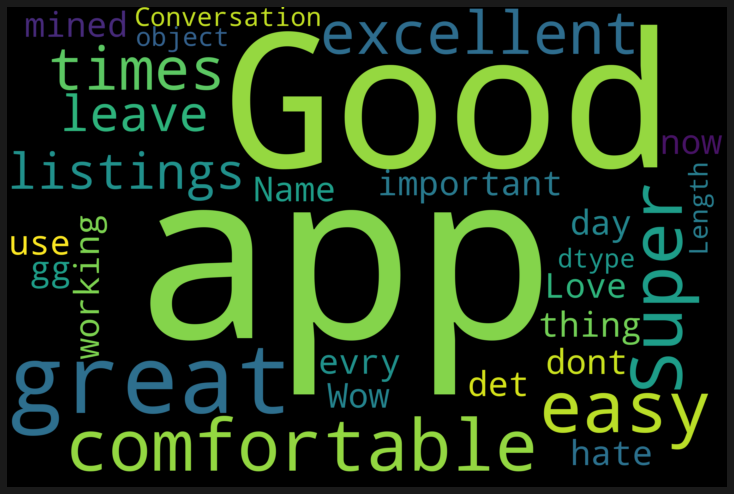

In [ ]:
#Wordcloud of the complete dataset
text = data_df.Conversation
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (10, 20),
    facecolor = 'k',
    edgecolor = 'k')


plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

The word *app* is the most common word in our dataset, which indicates that our reviews come indeed from the domain of software products.  
In this wordcloud, we can also observe that words like *good*, *great*, *excellent* and *super* are very common in our data, which is a frecuent phenomena when dealing with reviews, since they usually contain a lot of samples with positive polarity.

#### Exploring Topics Distribution

##### Topics Distribution

In [ ]:
print(f'total number of reviews: {len(data_df)}')

total number of reviews: 1048575


In [ ]:
topic_counts = list_to_series(data_df["Topic"]).value_counts()
topic_counts

Satisfied users           309161
Bugs                      117622
Design & UX                93069
Dissatisfied users         74313
Performance                56406
Use cases                  53235
Gaming                     45754
Feature Requests           42852
Complexity                 37849
Pricing                    28710
Security & Accounts        28584
Update                     28536
Camera & Photos            28372
Video                      27116
Customer Support           25900
Notifications & Alerts     24644
Frequency                  21840
Advertising                20442
Payment                    19004
Connectivity               18916
Devices                    16859
Audio                      16323
Sign Up & Login            12617
Location Services           7617
Privacy                     5288
Internationalization        4497
Streaming                   3378
Social & Collaboration      1953
Import Export                904
Battery                      661
HDMI      

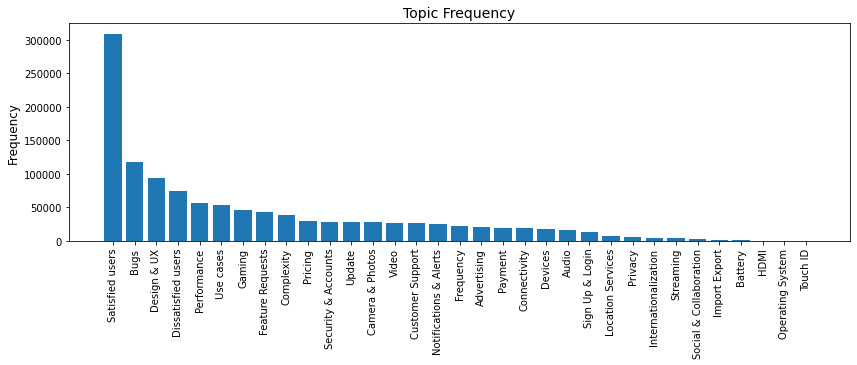

In [ ]:
fig, ax = plt.subplots(figsize = (14,4))
ax.bar(list_to_series(data_df["Topic"]).value_counts().index,
        list_to_series(data_df["Topic"]).value_counts().values)
ax.set_ylabel("Frequency", size = 12)
ax.set_title("Topic Frequency", size = 14)
for tick in ax.get_xticklabels():
    tick.set_rotation(90)

We can see that we have many topics that contain a high number of samples, which indicates that our dataset can be adecuate for using deep learning techniques. Despite this, there are a some categories that contain very few samples. In total, there are 7 categories that contain less than 4000 samples: Streaming, Social & Collaboration, Import Export, Battery, HDMI, Operating System and Touch ID. If we remove these categories, we end up with 26 categories for our analysis

##### Rows with no Topic

In [ ]:
rows_with_no_topic = topics_boolean_mask[(topics_boolean_mask==0).all(axis=1)]

print(f'numbers of samples that contain no topic: {rows_with_no_topic.shape[0]}')

numbers of samples that contain no topic: 412995


We can observe that *412995* from our *1048575* samples do not contain a topic. This is equivalent to the *39.38%* of our dataset. This shows us that in order to achieve a good accuracy score, a classifier would have to correctly learn the distribution of the rows that do not contain a topic from our set of topics. 



##### Rows Containing Multiple Topics

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


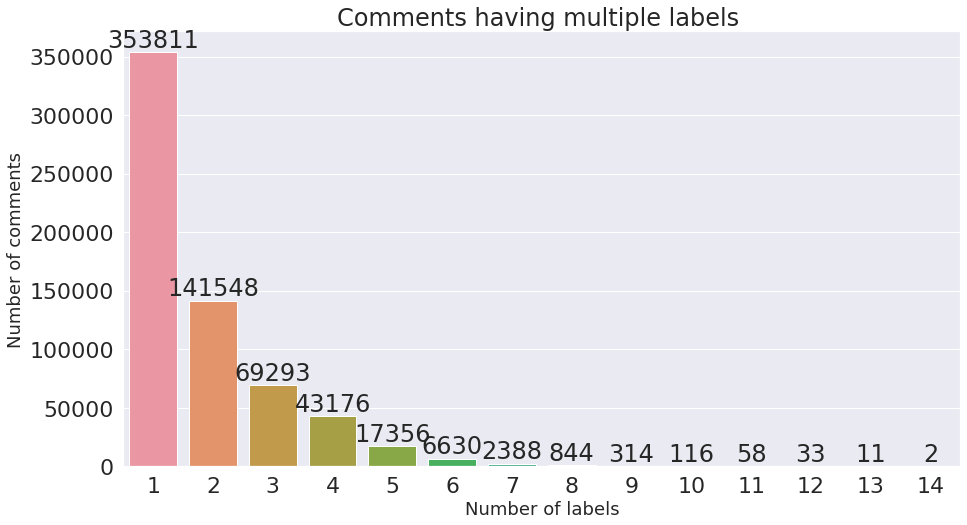

In [ ]:
#Number of topics per comment
row_sums = topics_boolean_mask.sum(axis=1)
multilabel_counts = row_sums.value_counts()
multilabel_counts = multilabel_counts.iloc[1:]

sn.set(font_scale = 2)
plt.figure(figsize=(15,8))

ax = sn.barplot(multilabel_counts.index, multilabel_counts.values)

plt.title("Comments having multiple labels ")
plt.ylabel('Number of comments', fontsize=18)
plt.xlabel('Number of labels', fontsize=18)

#adding the text labels
rects = ax.patches
labels = multilabel_counts.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')
plt.show()

From the plot, we can see that most of the samples contain only one topic. Despite this, we can also observe that high ammount of rows contain two or more topics, which may be challenging for our classifiers.

#### Exploring the Number of Words per Sentence


In [ ]:
#Calculate the number of words per sentence
nltk.download('punkt')
data_df['Tokens'] = data_df.apply (lambda row: len(nltk.word_tokenize(str(row["Conversation"]))), axis=1)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


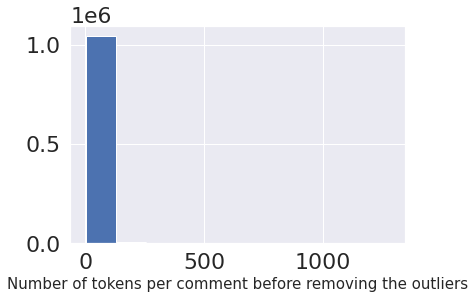

In [ ]:
#Number of tokens per sentence
tokens_per_sentence_plot = data_df["Tokens"].hist()
tokens_per_sentence_plot.set_xlabel("Number of tokens per comment before removing the outliers",fontsize=15)
plt.show()

The histogram shows that there are some outliers with a very high number of words. Lets explore how many reviews contain many words

In [ ]:
#Comments with many tokens
values_to_evaluate = [700,512,200,100,50,30,25,20,10]

for limit in values_to_evaluate:
    number_of_sentences = data_df[data_df["Tokens"].apply(lambda x: x > limit)].shape[0]
    print(f"comments with more than {limit} tokens: {number_of_sentences}, {(number_of_sentences/data_df.shape[0])*100} %")

comments with more than 700 tokens: 46, 0.004386906039148368 %
comments with more than 512 tokens: 110, 0.01049042748492001 %
comments with more than 200 tokens: 2047, 0.19521731874210238 %
comments with more than 100 tokens: 17348, 1.654435781894476 %
comments with more than 50 tokens: 79917, 7.6214863028395685 %
comments with more than 30 tokens: 161808, 15.431228095272157 %
comments with more than 25 tokens: 196785, 18.76689793290895 %
comments with more than 20 tokens: 242124, 23.090766039625205 %
comments with more than 10 tokens: 391822, 37.36709343633026 %


Less than 2% of our data contains more than 100 words. Because of this, it is safe to remove these outliers.  
We can see that *82%* of our dataset has less than *25* tokens. The following cell shows a plot of the number of words distribution for comments with less than 100 words.

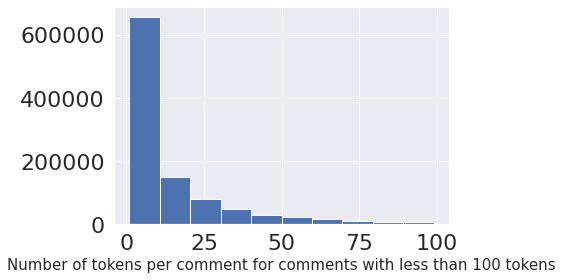

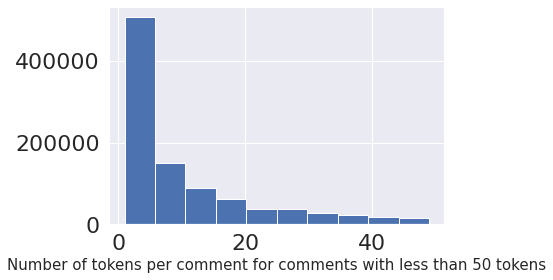

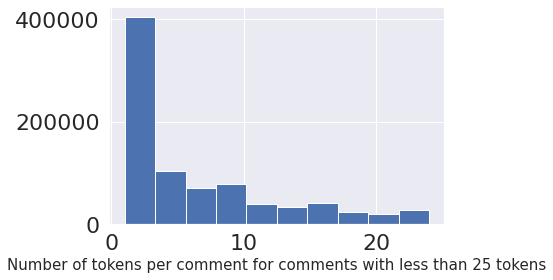

In [ ]:
#Barplots without outliers (removing all with more than 100 tokens)
values_to_plot = [100,50,25]

for limit in values_to_plot:
    data_df_without_outliers = data_df[data_df["Tokens"].apply(lambda x: x < limit)]
    tokens_per_sentence_plot = data_df_without_outliers["Tokens"].hist()
    tokens_per_sentence_plot.set_xlabel(f"Number of tokens per comment for comments with less than {limit} tokens",fontsize=15)
    plt.show()

From the above histograms, we can observe that we have many short sentences. Lets explore this in more detail.

In [ ]:
#Comments with few tokens
values_to_evaluate = [1,2,3,4,5]

for value in values_to_evaluate:
    number_of_sentences = data_df[data_df["Tokens"].apply(lambda x: x == value)].shape[0]
    print(f"comments with {value} tokens: {number_of_sentences}, {(number_of_sentences/data_df.shape[0])*100} %")

comments with 1 tokens: 203590, 19.415873924135134 %
comments with 2 tokens: 121766, 11.61252175571609 %
comments with 3 tokens: 78468, 7.483298762606394 %
comments with 4 tokens: 57156, 5.450826121164438 %
comments with 5 tokens: 46405, 4.425529885797392 %


We can observe that 19.41% of our sentences contain only one word. It is also interesting to note that 37% of our samples contain 3 or less words. Having so many short sentences could be a problem to our deep learning based classifiers, which use the entire context of the sentences in order to classify them.


In the following cell, we will explore how many short (less than 3 words) sentences actually contain a topic

In [ ]:
#How many short sentences do actually contain a topic?

complete_data_df = data_df.join(topics_boolean_mask)

rows_with_one_token_df = complete_data_df[complete_data_df["Tokens"].apply(lambda x: x == 1)]
rows_with_two_tokens_df = complete_data_df[complete_data_df["Tokens"].apply(lambda x: x == 2)]
rows_with_three_tokens_df = complete_data_df[complete_data_df["Tokens"].apply(lambda x: x == 3)]

dataframes = [rows_with_one_token_df,rows_with_two_tokens_df,rows_with_three_tokens_df]

i=1
for dataframe in dataframes:
    complete_data = dataframe.iloc[:,10:-4]
    rows_with_no_topic = complete_data[(complete_data==0).all(axis=1)]
    print(f"from all the comments with {i} words {rows_with_no_topic.shape[0]/dataframe.shape[0]}% have no topic")
    i+=1

from all the comments with 1 words 0.9742914681467656% have no topic
from all the comments with 2 words 0.8766568664487624% have no topic
from all the comments with 3 words 0.7780623948615997% have no topic


We can see that most of our short sentences with less than 3 words do not contain a topic. This indicates that even tough it may be difficult for our classifiers to learn the distribution of the sentences with no topic, it is possible that they have enough context to do well when predicting sentences with one or more topics.

#### Exploring Correlation Between Topics

For our classical methods, we use binary relevance in order to do multilabel classification. When doing this, the correlation between labels is ignored.  
In this section, we will explore the correlation between topics in our dataset, by using the Pearson's correlation coefficient.

In [ ]:
frequency_matrix = np.dot(topics_boolean_mask.T, topics_boolean_mask)

In [ ]:
frequency_df = pd.DataFrame(frequency_matrix, columns = topics_boolean_mask.columns.tolist(), index = topics_boolean_mask.columns.tolist())
correlation_df = frequency_df.corr(method='pearson')

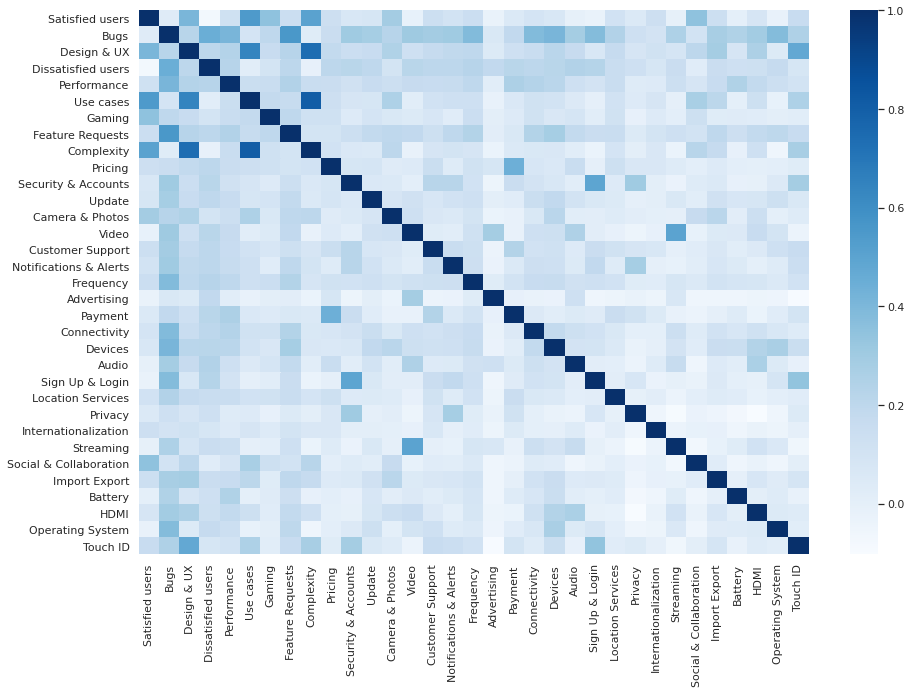

In [ ]:
#Plot a heatmap of the correlation
sn.set(font_scale=1.0)

fig, ax = plt.subplots(figsize = (15,10))
sn.heatmap(correlation_df, cmap = "Blues")
plt.xticks(rotation=90)
plt.show()

From this heatmap, we can see that there are some correlations between topics. For example, we can see that there is a strong correlation between the topics: 

*   *Complexity* and *Design & UX* 
*   *Complexity* and *Use Cases* 
*   *Use Cases* and *Design & UX* 

We can also see that there is a medium correlation between some topics, like for example:

*   *Design and UX* and *Touch ID*
*   *Complexity* and *Satisfied users*
*   *Bugs* and *Dissatisfied users*

Even tough there are correlations in our data, we can see that in general, most of the topics are not related with each other. This indicates that our methods will not be missing too much information by using binary relevance.

#### Exploring Correlation between Topic and Number of Stars Given

In our dataset, we have the column *Rating*, which indicates how many stars (from 1 to 5) the user gave to the application when writting the review.  
Lets explore if this column could be a useful feature for our classifiers.

In [ ]:
#Correlation between rating and topic
for topic in topic_counts.index:
    correlation = complete_data_df["Rating"].corr(complete_data_df[topic])
    correlation_degree = ""
    if abs(correlation) > 0.5:
        correlation_degree = "high"
    elif abs(correlation) > 0.3:
        correlation_degree = "medium"
    else:
        correlation_degree = "low"
    print(f"correlation degree: {correlation_degree}({correlation}), topic: {topic}")

correlation degree: medium(0.4897541154767254), topic: Satisfied users
correlation degree: medium(-0.3120734845430909), topic: Bugs
correlation degree: low(-0.04770420593042743), topic: Design & UX
correlation degree: medium(-0.3964219764104784), topic: Dissatisfied users
correlation degree: low(-0.14426823355590013), topic: Performance
correlation degree: low(0.05849207738970797), topic: Use cases
correlation degree: low(-0.014061688570192198), topic: Gaming
correlation degree: low(-0.09548896074779566), topic: Feature Requests
correlation degree: low(0.0836163845388369), topic: Complexity
correlation degree: low(-0.10878285213584644), topic: Pricing
correlation degree: low(-0.13201854495212673), topic: Security & Accounts
correlation degree: low(-0.11469293698083582), topic: Update
correlation degree: low(-0.03416371115786192), topic: Camera & Photos
correlation degree: low(-0.15139472408983912), topic: Video
correlation degree: low(-0.09013436341375478), topic: Customer Support
corr

We can observe that only the topics: *Satisfied users*, *Bugs* and *Dissatisfied users* have a medium correlation with the ammount of stars given by the user. For the rest of the topics, the correlation is low. This indicates that this is not a useful feature for our classifiers.


### Data Preprocessing and Splitting


#### Configuration Variables

In [26]:
underrepresented_threshold = 4000
train_data_id = '104YhjBtZe60wOua-5N-qrtQWX-aEX2bh'
validation_data_id = '1wWwbLsv_2zEIHEuyPDwJYrixC1x-KuRQ'
test_data_id = '1BavA_6Sm3u6YguU-u51_wQAlmqWNhTzf'

#### Renaming Dataset Columns

We will first rename the columns of our dataset, to make them pep8-compliant

In [15]:
#Load dataset
data_df = pd.read_csv(data_PATH + '/data.csv')

#Lowercase columns to make them PEP 8 compliant
data_df.columns = map(str.lower, data_df.columns)

#### Removing Underrepresented Topics

In our EDA, we saw that there are some topics in the dataset that contain only a few samples. In order to focus on the topics that appear the most in our dataset and have enough data points for our models, we will remove the topics that contain less than 4000 samples.  
The following block contains a helper class to preprocess our dataset.

In [16]:
#Helper class to preprocess the dataset
class DataProcessor():

    @classmethod
    def obtain_boolean_mask_from_dataset(cls,dataset):
        dataset_topics = cls.get_column_indexes_as_list(dataset["topic"])
        boolean_mask = cls.generate_boolean_mask(dataset["topic"],dataset_topics).astype(int)
        return boolean_mask
    
    @classmethod
    def generate_boolean_mask(cls,item_lists, unique_items):
        bool_dict = {}
        
        # Loop through all the tags
        for i, item in enumerate(unique_items):
            
            # Apply boolean mask
            bool_dict[item] = item_lists.apply(lambda x: item in x)
                
        # Return the results as a dataframe
        return pd.DataFrame(bool_dict)
    
    @classmethod
    def get_column_indexes_as_list(cls,column):
        return cls.convert_list_to_series(column).value_counts().index.tolist()
    
    @classmethod
    def get_column_indexes(cls,column):
        return cls.convert_list_to_series(column).value_counts()

    @classmethod
    def convert_list_to_series(cls,list):
        return pd.Series([x for _list in list for x in _list])
    
    @classmethod
    def get_underrepresented_topics(cls,dataset,threshold):
        dataset_topics = cls.get_column_indexes(dataset["topic"])
        return dataset_topics[dataset_topics < threshold].index.tolist()
    
    @classmethod
    def remove_topics_from_dataset(cls,dataset,boolean_mask,topics):

        dataset = dataset.join(boolean_mask)

        for topic in topics:
            dataset = dataset[~cls.row_contains_only_this_topic(dataset,topic)]
        
        dataset = dataset.drop(columns=topics)
        
        remaining_topics = dataset.iloc[:,8:].columns

        return dataset, remaining_topics

    @classmethod
    def row_contains_only_this_topic(cls,dataset, topic):
        row_contains_topic = (dataset[topic] == 1)
        row_has_only_one_topic = ((dataset.iloc[:,9:].drop(columns=topic) == 0).all(axis = 1))
        return row_contains_topic & row_has_only_one_topic


In the following code block, we remove the topics that contain less than 4000 samples. After doing that, we end up with 26 topics.

In [17]:
#Convert the topic column into a list
data_df["topic"] = data_df["topic"].apply(eval)

#Generate boolean mask
boolean_mask = DataProcessor.obtain_boolean_mask_from_dataset(data_df)

#Remove underrepresented topics
underrepresented_topics = DataProcessor.get_underrepresented_topics(data_df,underrepresented_threshold)
data_df, remaining_topics = DataProcessor.remove_topics_from_dataset(data_df,boolean_mask,underrepresented_topics)

#### Splitting Dataset into Training, Validation and Test Sets.

To train and test out classifiers, we divided our dataset in the following way:


*   Training Set: 70%
*   Validation Set: 15%
*   Test Set: 15%

In [11]:
#Split Dataset into train, validation and test set
train_df, rest_df = train_test_split(data_df, test_size=0.3,shuffle = True)
validation_df,test_df = train_test_split(rest_df,test_size=0.5,shuffle = True)

Lets analyze the splits, to ensure that the original distribution is preserved, and that the splits have a similar distribution.

In [12]:
train_topic_counts = DataProcessor.get_column_indexes(train_df["topic"])
train_topic_counts = train_topic_counts[train_topic_counts.index.isin(remaining_topics)]

validation_topic_counts = DataProcessor.get_column_indexes(validation_df["topic"])
validation_topic_counts = validation_topic_counts[validation_topic_counts.index.isin(remaining_topics)]

test_topic_counts = DataProcessor.get_column_indexes(test_df["topic"])
test_topic_counts = test_topic_counts[test_topic_counts.index.isin(remaining_topics)]

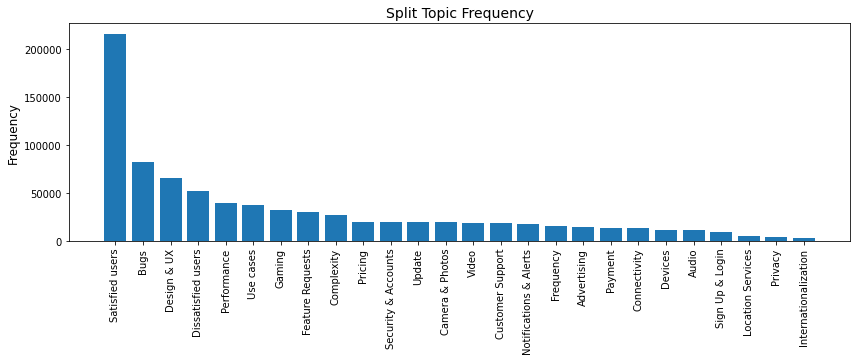

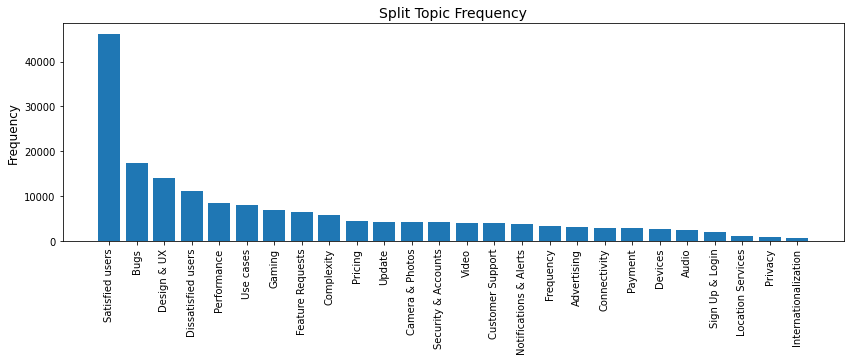

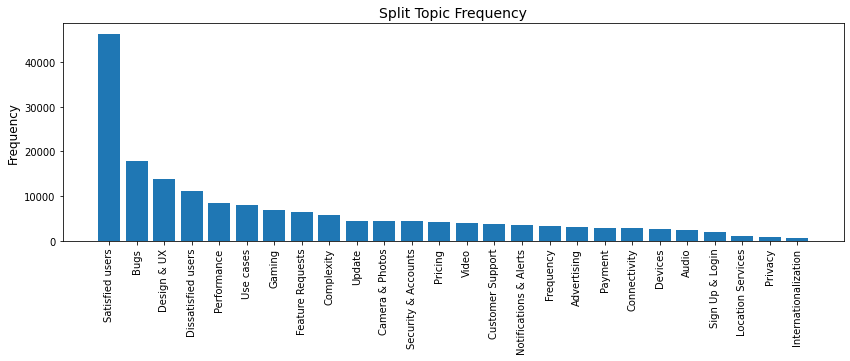

In [13]:
def plot_topics(topic_counts):
    fig, ax = plt.subplots(figsize = (14,4))
    ax.bar(topic_counts.index,
            topic_counts.values)
    ax.set_ylabel("Frequency", size = 12)
    ax.set_title("Split Topic Frequency", size = 14)
    for tick in ax.get_xticklabels():
        tick.set_rotation(90)

plot_topics(train_topic_counts)
plot_topics(validation_topic_counts)
plot_topics(test_topic_counts)

We can see that after dividing the dataset, the original distribution was preserved, and our splits share a similiar distribution among them. Lets save the splits that we generated.

In [20]:
train_df.to_csv(root_PATH + '/data/train.csv', index=False)
validation_df.to_csv(root_PATH + '/data/validation.csv', index=False)
test_df.to_csv(root_PATH + '/data/test.csv', index=False)

When generating the splits using the previous cells, the data is randomly shuffled. For this reason, in order to ensure the reproducibility of the results obtained in the rest of the notebook, we will donwload the original splits that we used to train, validate and test our data.

In [27]:
!gdown --id $train_data_id -O $data_PATH/train.csv
!gdown --id $validation_data_id -O $data_PATH/validation.csv
!gdown --id $test_data_id -O $data_PATH/test.csv

Downloading...
From: https://drive.google.com/uc?id=104YhjBtZe60wOua-5N-qrtQWX-aEX2bh
To: /tmp/data/train.csv
130MB [00:02, 59.7MB/s]
Downloading...
From: https://drive.google.com/uc?id=1wWwbLsv_2zEIHEuyPDwJYrixC1x-KuRQ
To: /tmp/data/validation.csv
27.8MB [00:00, 33.9MB/s]
Downloading...
From: https://drive.google.com/uc?id=1BavA_6Sm3u6YguU-u51_wQAlmqWNhTzf
To: /tmp/data/test.csv
27.9MB [00:00, 45.4MB/s]


### Classical Methods

In this section, we will train and validate 4 classical methods: Naive Bayes, SVC, Logistic Regression and KNN-based classifier using our dataset.  

#### Previous Steps

##### Configuration Variables and Environment Preparation



In [79]:
#Configuration variables
models_PATH = root_PATH + '/models'
classical_models_PATH = root_PATH + '/models/classical_methods'

In [80]:
#Create folder to store the models
!mkdir $models_PATH
!mkdir $classical_models_PATH

To evaluate the performance our classifiers in the validation set, we use the helper class *ModelEvaluator*. This class will be used to evaluate all our classical and deep learning based models.

In [45]:
from re import T
from sklearn.metrics import accuracy_score
import pandas as pd

#Helper class to evaluate the performance of our models
class ModelEvaluator():
    
    @classmethod
    def get_total_accuracy(cls, targets, predictions):
        accuracy = accuracy_score(targets, predictions)
        return accuracy
    
    @classmethod
    def get_accuracy_per_label(cls, labels, targets, predictions):
        accuracy_per_label = {}
        i = 0
        for label in labels:
            label_targets = targets[:,i]
            label_predicitons = predictions[:,i]

            label_accuracy = accuracy_score(label_targets, label_predicitons)

            accuracy_per_label[label] = label_accuracy

            i += 1
        
        accuracy_per_label["no topic"] = cls.get_accuracy_comments_with_no_topic(targets, predictions)
        
        return accuracy_per_label
    
    @classmethod
    def get_accuracy_comments_with_no_topic(cls, targets, predictions):

        targets = pd.DataFrame(targets).reset_index(drop=True)
        predictions = pd.DataFrame(predictions).reset_index(drop=True)

        #Get all comments with no topic
        targets = targets.loc[(targets==0).all(axis=1)]

        #Get the predicitions of those comments with no topic
        predictions = predictions[predictions.index.isin(targets.index)]

        accuracy = accuracy_score(targets, predictions)

        return accuracy

##### Loading Datasets and Generating Boolean Masks

In [47]:
#Load datasets
train_df = pd.read_csv(root_PATH + '/data/train.csv')
validation_df = pd.read_csv(root_PATH + '/data/validation.csv')

#Get boolean mask of the datasets
train_boolean_mask = train_df.iloc[:,8:]
validation_boolean_mask = validation_df.iloc[:,8:]

#Get topics present in the dataset
remaining_topics = train_boolean_mask.columns.tolist()

##### Data preparation

Before training our classical methods, we will clean and prepare our data by doing the following: removing html, lowercasing, standarizing space characters, removing contractions and removing punctuation. To do so, we define and use the helper class: *DataCleaner*.

In [48]:
import re
from nltk.stem.snowball import SnowballStemmer

#Helper class for data cleaning
class DataCleaner():

    @classmethod
    def lowercase(cls, text):
        return text.lower()
    
    @classmethod
    def replace_spaces(cls, text):
        text = re.sub(r"\'s", " ", text)
        text = re.sub('\W', ' ', text)
        text = re.sub('\s+', ' ', text)
        return text

    @classmethod
    def remove_contractions(cls, text):   
        text = re.sub(r"\'ve", " have ", text)
        text = re.sub(r"can't", "can not ", text)
        text = re.sub(r"n't", " not ", text)
        text = re.sub(r"i'm", "i am ", text)
        text = re.sub(r"\'re", " are ", text)
        text = re.sub(r"\'d", " would ", text)
        text = re.sub(r"\'ll", " will ", text)
        text = re.sub(r"\'scuse", " excuse ", text)
        return text

    @classmethod
    def remove_html(cls,text):
        cleanr = re.compile('<.*?>')
        cleantext = re.sub(cleanr, ' ', str(text))
        return cleantext
    
    @classmethod
    def remove_punctuation(cls,text):
        cleaned = re.sub(r'[?|!|\'|"|#]',r'',text)
        cleaned = re.sub(r'[.|,|)|(|\|/]',r' ',cleaned)
        cleaned = cleaned.strip()
        cleaned = cleaned.replace("\n"," ")
        return cleaned
    
    @classmethod
    def do_stemming(cls,text):
        stemmer = SnowballStemmer("english")

        stemSentence = ""
        for word in text.split():
            stem = stemmer.stem(word)
            stemSentence += stem
            stemSentence += " "
        stemSentence = stemSentence.strip()
        return stemSentence

    @classmethod
    def clean_text_for_classical_methods(cls,text):
        text = cls.remove_html(text)
        text = cls.lowercase(text)
        text = cls.replace_spaces(text)
        text = cls.remove_contractions(text)
        text = cls.remove_punctuation(text)
        #text = cls.do_stemming(text)
        
        return text

In [49]:
#Clean datasets for classical methods
train_df['conversation'] = train_df['conversation'].map(lambda row : DataCleaner.clean_text_for_classical_methods(str(row)))
validation_df['conversation'] = validation_df['conversation'].map(lambda row : DataCleaner.clean_text_for_classical_methods(str(row)))

#### Training and Validating the Models

##### Naive Bayes

In [60]:
#Train and evaluate a Multinomial Naive Bayes Classifier
x_train = train_df["conversation"]
x_test = validation_df["conversation"]
stop_words = set(stopwords.words('english'))

classifier = BinaryRelevance(
    classifier = MultinomialNB(fit_prior=True, class_prior=None),
    require_dense = [False, True]
)

NB_pipeline = Pipeline([
                ('tfidf', TfidfVectorizer(stop_words=stop_words)),
                ('clf', classifier),
            ])

NB_pipeline.fit(x_train, train_boolean_mask)

predictions = NB_pipeline.predict(x_test)
total_accuracy = ModelEvaluator.get_total_accuracy(validation_boolean_mask, predictions)
accuracy_per_label = ModelEvaluator.get_accuracy_per_label(remaining_topics, validation_boolean_mask.to_numpy(), predictions.toarray())

print(f"total accuracy: {total_accuracy}")
print(f"accuracy per label: {accuracy_per_label}")

total accuracy: 0.5254664553215056
accuracy per label: {'Satisfied users': 0.8413256179617924, 'Bugs': 0.9189885988197773, 'Design & UX': 0.9262774605478423, 'Dissatisfied users': 0.9310772873975899, 'Performance': 0.9519126100490805, 'Use cases': 0.9518362202318431, 'Gaming': 0.9580492587004819, 'Feature Requests': 0.9593542514116201, 'Complexity': 0.9704116774567284, 'Pricing': 0.973142613422964, 'Security & Accounts': 0.9732635639669233, 'Update': 0.9723468861600748, 'Camera & Photos': 0.9738428534143065, 'Video': 0.9755807217564565, 'Customer Support': 0.9750523588538981, 'Notifications & Alerts': 0.9771912737365442, 'Frequency': 0.9789546053511067, 'Advertising': 0.9838371878361948, 'Payment': 0.9826595114871187, 'Connectivity': 0.9819083449509514, 'Devices': 0.9836844082017201, 'Audio': 0.9854923005430043, 'Sign Up & Login': 0.9880258961480435, 'Location Services': 0.9927684306348631, 'Privacy': 0.9948118582459625, 'Internationalization': 0.99584948659677, 'no topic': 0.911497730

In [82]:
#Save model
dump(NB_pipeline, classical_models_PATH + '/naive_bayes.joblib')

['/tmp/models/classical_methods/naive_bayes.joblib']

##### SVC

In [86]:
#Train and evaluate a SVC
x_train = train_df["conversation"]
x_test = validation_df["conversation"]
stop_words = set(stopwords.words('english'))

classifier = BinaryRelevance(
    classifier = LinearSVC(),
    require_dense = [False, True]
)

NB_pipeline = Pipeline([
                ('tfidf', TfidfVectorizer(stop_words=stop_words)),
                ('clf', classifier),
            ])

NB_pipeline.fit(x_train, train_boolean_mask)

predictions = NB_pipeline.predict(x_test)
total_accuracy = ModelEvaluator.get_total_accuracy(validation_boolean_mask, predictions)
accuracy_per_label = ModelEvaluator.get_accuracy_per_label(remaining_topics, validation_boolean_mask.to_numpy(), predictions.todense())

print(f"total accuracy: {total_accuracy}")
print(f"accuracy per label: {accuracy_per_label}")

total accuracy: 0.6850575151665617
accuracy per label: {'Satisfied users': 0.8664196729242659, 'Bugs': 0.9658601175130022, 'Design & UX': 0.9714811348980514, 'Dissatisfied users': 0.9550700558282248, 'Performance': 0.9877458001515065, 'Use cases': 0.9614868004761632, 'Gaming': 0.982672243123325, 'Feature Requests': 0.9691512454723119, 'Complexity': 0.9899165441246682, 'Pricing': 0.9899992997600087, 'Security & Accounts': 0.9942580320709916, 'Update': 0.9882232365092399, 'Camera & Photos': 0.9967152378587935, 'Video': 0.9982175709311282, 'Customer Support': 0.9924565055478105, 'Notifications & Alerts': 0.9979565723889006, 'Frequency': 0.9880195303299404, 'Advertising': 0.9974536727587546, 'Payment': 0.9962123382286474, 'Connectivity': 0.9956457804174703, 'Devices': 0.9961932407743381, 'Audio': 0.9979565723889006, 'Sign Up & Login': 0.9935386946253397, 'Location Services': 0.9992233701914202, 'Privacy': 0.9982112051130251, 'Internationalization': 0.9990896880112548, 'no topic': 0.8607203

In [87]:
#Save model
dump(NB_pipeline, models_location + '/SVC.joblib')

['/tmp/models/SVC.joblib']

##### Logistic Regression

In [91]:
#Train and evaluate a Logistic Regression Model
x_train = train_df["conversation"]
x_test = validation_df["conversation"]
stop_words = set(stopwords.words('english'))

classifier = BinaryRelevance(
    classifier = LogisticRegression(solver='sag'),
    require_dense = [False, True]
)

NB_pipeline = Pipeline([
                ('tfidf', TfidfVectorizer(stop_words=stop_words)),
                ('clf', classifier),
            ])

NB_pipeline.fit(x_train, train_boolean_mask)

predictions = NB_pipeline.predict(x_test)
total_accuracy = ModelEvaluator.get_total_accuracy(validation_boolean_mask, predictions)
accuracy_per_label = ModelEvaluator.get_accuracy_per_label(remaining_topics, validation_boolean_mask.to_numpy(), predictions.todense())

print(f"total accuracy: {total_accuracy}")
print(f"accuracy per label: {accuracy_per_label}")

total accuracy: 0.6810088548529815
accuracy per label: {'Satisfied users': 0.8715568881334784, 'Bugs': 0.9651853407940721, 'Design & UX': 0.9700488258248509, 'Dissatisfied users': 0.9561649765419603, 'Performance': 0.986256198715378, 'Use cases': 0.9616268484744317, 'Gaming': 0.9811890075052996, 'Feature Requests': 0.968597419297341, 'Complexity': 0.9902157375755145, 'Pricing': 0.9886497463221486, 'Security & Accounts': 0.99237374991247, 'Update': 0.9866381478015647, 'Camera & Photos': 0.9957730967795326, 'Video': 0.9976255498475387, 'Customer Support': 0.9916862415573338, 'Notifications & Alerts': 0.9967916276760308, 'Frequency': 0.9874147776101446, 'Advertising': 0.9965560924062156, 'Payment': 0.9952765629674898, 'Connectivity': 0.9944553724321881, 'Devices': 0.9950983200606026, 'Audio': 0.9968425542208557, 'Sign Up & Login': 0.9933158909917308, 'Location Services': 0.9984021796561185, 'Privacy': 0.9973581854872079, 'Internationalization': 0.9983257898388811, 'no topic': 0.8573405864

In [92]:
#Save model
dump(NB_pipeline, models_location + '/logistic_regression.joblib')

['/tmp/models/logistic_regression.joblib']

##### KNN-based Classifier

In [ ]:
#Train and evaluate a KNN classifier
x_train = train_df["conversation"].to_numpy()
x_test = validation_df["conversation"].to_numpy()
stop_words = set(stopwords.words('english'))

classifier = BRkNNaClassifier(k=3)

NB_pipeline = Pipeline([
                ('tfidf', TfidfVectorizer(stop_words=stop_words)),
                ('clf', classifier),
            ])

NB_pipeline.fit(x_train, train_boolean_mask.to_numpy())

predictions = NB_pipeline.predict(x_test)
total_accuracy = ModelEvaluator.get_total_accuracy(validation_boolean_mask, predictions)
accuracy_per_label = ModelEvaluator.get_accuracy_per_label(remaining_topics, validation_boolean_mask.to_numpy(), predictions.todense())

print(f"total accuracy: {total_accuracy}")
print(f"accuracy per label: {accuracy_per_label}")

total accuracy: 0.5636931930307023
accuracy per label: {'Satisfied users': 0.8330882493363635, 'Bugs': 0.9042389982748633, 'Design & UX': 0.9363163556964523, 'Dissatisfied users': 0.9348904124413548, 'Performance': 0.9600290281305502, 'Use cases': 0.9573681161634487, 'Gaming': 0.968202738574948, 'Feature Requests': 0.9612067044796262, 'Complexity': 0.979756698432099, 'Pricing': 0.9751160170349292, 'Security & Accounts': 0.9785981195373323, 'Update': 0.9753069915780227, 'Camera & Photos': 0.9795529922527993, 'Video': 0.9796612111605523, 'Customer Support': 0.9786426802640541, 'Notifications & Alerts': 0.9800113311562235, 'Frequency': 0.9807497660561847, 'Advertising': 0.9878094583325376, 'Payment': 0.9837607980189574, 'Connectivity': 0.984862084550796, 'Devices': 0.9856068852688603, 'Audio': 0.9873511194291135, 'Sign Up & Login': 0.990521296844464, 'Location Services': 0.9937424008046394, 'Privacy': 0.9954102451476552, 'Internationalization': 0.996575189860525, 'no topic': 0.87900344416

In [ ]:
#Save model
dump(NB_pipeline, models_location + '/KNN.joblib')

### Deep Learning Methods

### References

Alghamdi, R., & Alfalqi, K. (2015). A Survey of Topic Modeling in Text Mining. International Journal of Advanced Computer Science and Applications, 6. https://doi.org/10.14569/IJACSA.2015.060121  

Allala, S. C., Sotomayor, J. P., Santiago, D., King, T. M., & Clarke, P. J. (2019, 15-19 Jul 2019). Towards Transforming User Requirements to Test Cases Using MDE and NLP. 2019 IEEE 43rd Annual Computer Software and Applications Conference (COMPSAC),  

Anding, K., Haar, L., Polte, G., Walz, J., & Notni, G. (2019). Comparison of the performance of innovative deep learning and classical methods of machine learning to solve industrial recognition tasks. Proc.SPIE,  

Bengio, Y., Ducharme, R., Vincent, P., & Janvin, C. (2003). A neural probabilistic language model. J. Mach. Learn. Res., 3(null), 1137–1155. 
Chowdhary, K. R. (2020). Natural Language Processing. In K. R. Chowdhary (Ed.), Fundamentals of Artificial Intelligence (pp. 603-649). Springer India. https://doi.org/10.1007/978-81-322-3972-7_19   

Cordobés, H., Fernández Anta, A., Chiroque, L., Pérez, F., Redondo, T., & Santos, A. i. (2014). Graph-based Techniques for Topic Classification of Tweets in Spanish. International Jorunal of Interactive Multimedia and Artificial Intelligence, 2, 31-37. https://doi.org/10.9781/ijimai.2014.254  

Devlin, J., Chang, M.-W., Lee, K., & Toutanova, K. (2019). BERT: Pre-training of Deep Bidirectional Transformers for Language Understanding. arXiv:1810.04805 [cs]. http://arxiv.org/abs/1810.04805  

Ikonomakis, E., Kotsiantis, S., & Tampakas, V. (2005). Text Classification Using Machine Learning Techniques. WSEAS transactions on computers, 4, 966-974. 
Iman, Z., Sanner, S., Bouadjenek, M. R., & Xie, L. (2017). A Longitudinal Study of Topic Classification on Twitter. ICWSM,  

Lee, K., Palsetia, D., Narayanan, R., Patwary, M. M. A., Agrawal, A., & Choudhary, A. (2011). Twitter Trending Topic Classification. https://doi.org/10.1109/ICDMW.2011.171  

Liu, Y., Ott, M., Goyal, N., Du, J., Joshi, M., Chen, D., Levy, O., Lewis, M., Zettlemoyer, L., & Stoyanov, V. (2019). RoBERTa: A Robustly Optimized BERT Pretraining Approach. arXiv:1907.11692 [cs]. http://arxiv.org/abs/1907.11692  

Mei, Q., Cai, D., Zhang, D., & Zhai, C. (2008). Topic modeling with network regularization Proceedings of the 17th international conference on World Wide Web, Beijing, China. https://doi.org/10.1145/1367497.1367512  

Minaee, S., Kalchbrenner, N., Cambria, E., Nikzad, N., Chenaghlu, M., & Gao, J. (2020). Deep Learning Based Text Classification: A Comprehensive Review. arXiv e-prints, arXiv:2004.03705. https://ui.adsabs.harvard.edu/abs/2020arXiv200403705M  

Nazir, F., Butt, W. H., Anwar, M. W., & Khan Khattak, M. A. (2017, 2017//). The Applications of Natural Language Processing (NLP) for Software Requirement Engineering - A Systematic Literature Review. Information Science and Applications 2017, Singapore.  

Qu, B., Cong, G., Li, C., Sun, A., & Chen, H. (2012). An evaluation of classification models for question topic categorization. Journal of the American Society for Information Science and Technology, 63. https://doi.org/10.1002/asi.22611  

Quercia, D., Askham, H., & Crowcroft, J. (2012). TweetLDA: Supervised topic classification and link prediction in Twitter. https://doi.org/10.1145/2380718.2380750  

Radford, A. (2018). Improving Language Understanding by Generative Pre-Training.  

Radford, A., Wu, J., Child, R., Luan, D., Amodei, D., & Sutskever, I. (2019). Language Models are Unsupervised Multitask Learners.  

Richardson, A. (2011). Logistic Regression: A Self‐Learning Text, Third Edition by David G. Kleinbaum, Mitchel Klein. International Statistical Review, 79, 296-296. https://doi.org/10.2307/41305046  

Spyromitros-Xioufis, E., Tsoumakas, G., & Vlahavas, I. (2008). An Empirical Study of Lazy Multilabel Classification Algorithms (Vol. 5138). https://doi.org/10.1007/978-3-540-87881-0_40  

Srivastava, D., & Bhambhu, L. (2010). Data classification using support vector machine. Journal of Theoretical and Applied Information Technology, 12, 1-7.  

Varga, A., Cano Basave, A., Rowe, M., & Ciravegna, F. (2014). Linked knowledge sources for topic classification of microposts: A semantic graph-based approach. Journal of Web Semantics. https://doi.org/10.1016/j.websem.2014.04.001  

Vaswani, A., Shazeer, N., Parmar, N., Uszkoreit, J., Jones, L., Gomez, A. N., Kaiser, L., & Polosukhin, I. (2017). Attention Is All You Need. arXiv:1706.03762 [cs]. http://arxiv.org/abs/1706.03762  

Vijayakumar, K., & Arun, C. (2017). Automated risk identification using NLP in cloud based development environments. Journal of Ambient Intelligence and Humanized Computing. https://doi.org/10.1007/s12652-017-0503-7  

Wang, S., & Manning, C. (2012, jul). Baselines and Bigrams: Simple, Good Sentiment and Topic Classification. Proceedings of the 50th Annual Meeting of the Association for Computational Linguistics (Volume 2: Short Papers), Jeju Island, Korea.
Webb, G. (2016). Naïve Bayes. In (pp. 1-2). https://doi.org/10.1007/978-1-4899-7502-7_581-1  

Yang, Z., Dai, Z., Yang, Y., Carbonell, J., Salakhutdinov, R., & Le, Q. V. (2020). XLNet: Generalized Autoregressive Pretraining for Language Understanding. arXiv:1906.08237 [cs]. http://arxiv.org/abs/1906.08237  

Yong, Z., Youwen, L., & Shixiong, X. (2009). An Improved KNN Text Classification Algorithm Based on Clustering. Journal of Computers, 4. https://doi.org/10.4304/jcp.4.3.230-237
